In [122]:
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [123]:
data = load_breast_cancer()

In [124]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [125]:
data.data.shape

(569, 30)

In [126]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [127]:
data.target.shape

(569,)

In [128]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [129]:
x_train, x_test, y_train, y_test = train_test_split(data.data,  data.target, test_size=0.33)
N, D = x_train.shape

In [130]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [131]:
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [132]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [133]:
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [134]:
epochs = 1000

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for i in range(epochs):
    optimizer.zero_grad()
    
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    train_acc = np.mean(np.round(outputs.detach().numpy()) == y_train.numpy())
    
    loss.backward()
    optimizer.step()
    
    output_test = model(x_test)
    loss_test = criterion(output_test, y_test)
    test_acc = np.mean(np.round(output_test.detach().numpy()) == y_test.numpy())
    
    train_losses.append(loss.item())
    test_losses.append(loss_test.item())
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    if(i + 1) % 50 == 0:
        print(f"Epoch {i + 1}/{epochs}, train_loss: {loss.item():.4f}, test_loss: {loss_test.item():.4f}")

Epoch 50/1000, train_loss: 0.5204, test_loss: 0.5206
Epoch 100/1000, train_loss: 0.3816, test_loss: 0.3779
Epoch 150/1000, train_loss: 0.3079, test_loss: 0.3042
Epoch 200/1000, train_loss: 0.2611, test_loss: 0.2579
Epoch 250/1000, train_loss: 0.2282, test_loss: 0.2258
Epoch 300/1000, train_loss: 0.2037, test_loss: 0.2024
Epoch 350/1000, train_loss: 0.1847, test_loss: 0.1846
Epoch 400/1000, train_loss: 0.1695, test_loss: 0.1708
Epoch 450/1000, train_loss: 0.1571, test_loss: 0.1597
Epoch 500/1000, train_loss: 0.1467, test_loss: 0.1508
Epoch 550/1000, train_loss: 0.1378, test_loss: 0.1435
Epoch 600/1000, train_loss: 0.1302, test_loss: 0.1373
Epoch 650/1000, train_loss: 0.1236, test_loss: 0.1322
Epoch 700/1000, train_loss: 0.1177, test_loss: 0.1278
Epoch 750/1000, train_loss: 0.1125, test_loss: 0.1240
Epoch 800/1000, train_loss: 0.1079, test_loss: 0.1207
Epoch 850/1000, train_loss: 0.1036, test_loss: 0.1179
Epoch 900/1000, train_loss: 0.0998, test_loss: 0.1154
Epoch 950/1000, train_loss: 0

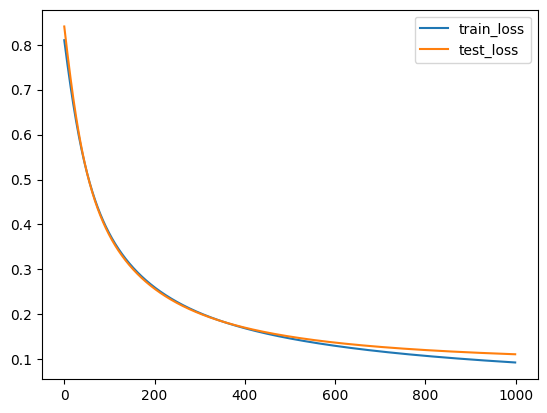

In [135]:
plt.plot(train_losses, label="train_loss")
plt.plot(test_losses, label="test_loss")
plt.legend()
plt.show()

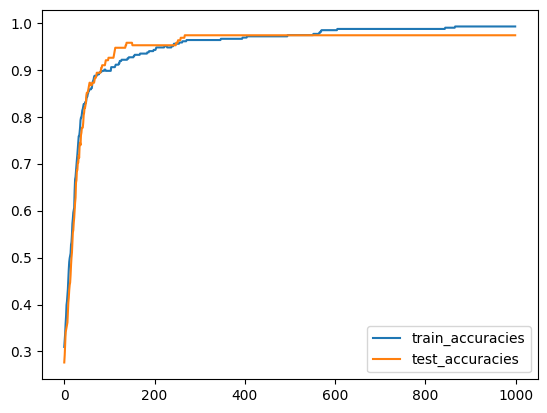

In [136]:
plt.plot(train_accuracies, label="train_accuracies")
plt.plot(test_accuracies, label="test_accuracies")
plt.legend()
plt.show()

In [137]:
with torch.no_grad():
    p_train = model(x_train).numpy()
    p_train = np.round(p_train)
    train_acc = np.mean(y_train.numpy() == p_train)
    
    p_test = model(x_test).numpy()
    p_test = np.round(p_test)
    test_acc = np.mean(y_test.numpy() == p_test)
    
print(f"train_acc: {train_acc:.4f}, test_acc: {test_acc:.4f}")

train_acc: 0.9921, test_acc: 0.9734
